In [3]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                                      parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

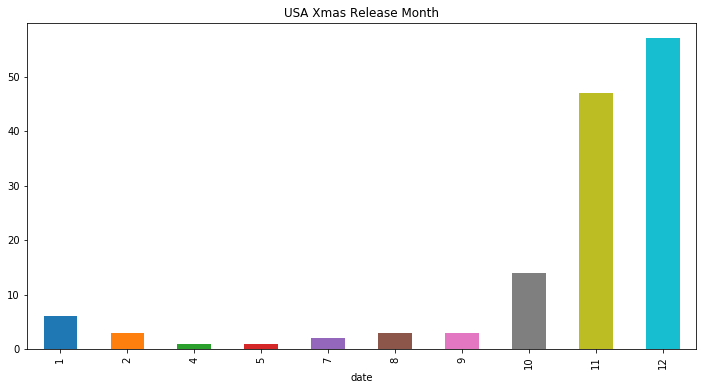

In [21]:
r = release_dates
xmas_us = r[(r.title.str.contains('Christmas')) & (r.country == 'USA')]
grouped = xmas_us.groupby(xmas_us.date.dt.month)
grouped.size().plot(kind='bar', figsize=[12,6], title='USA Xmas Release Month')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

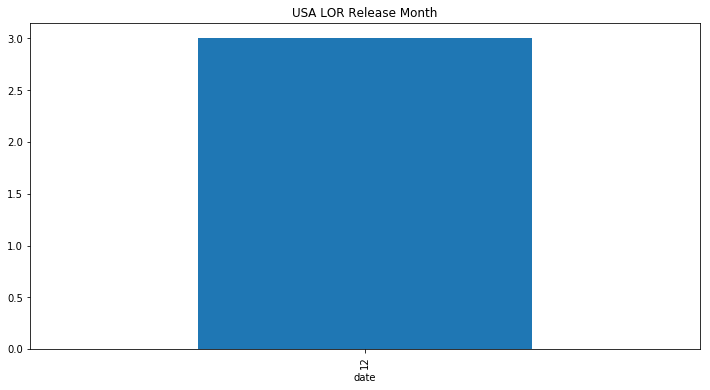

In [22]:
r = release_dates
lor_us = r[(r.title.str.startswith('The Hobbit')) & (r.country == 'USA')]
grouped = lor_us.groupby(lor_us.date.dt.month)
grouped.size().plot(kind='bar', figsize=[12,6], title='USA LOR Release Month')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

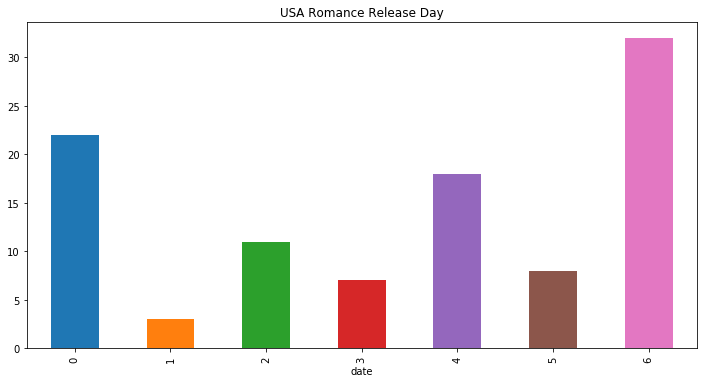

In [24]:
r = release_dates
rom_us = r[(r.title.str.contains('Romance')) & (r.country == 'USA')]
grouped = rom_us.groupby(rom_us.date.dt.dayofweek)
grouped.size().plot(kind='bar', figsize=[12,6], title='USA Romance Release Day')

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

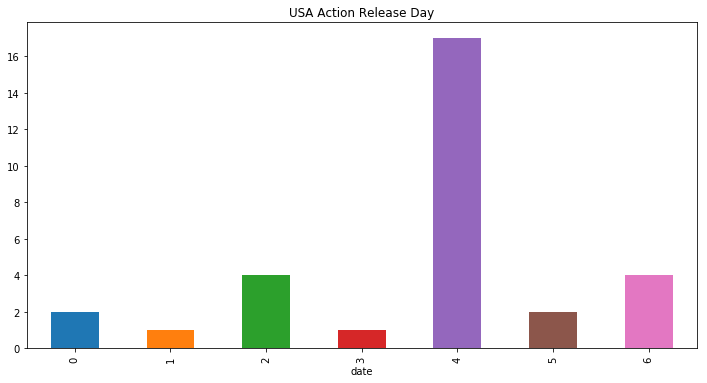

In [25]:
r = release_dates
act_us = r[(r.title.str.contains('Action')) & (r.country == 'USA')]
grouped = act_us.groupby(act_us.date.dt.dayofweek)
grouped.size().plot(kind='bar', figsize=[12,6], title='USA Action Release Day')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [36]:
c = cast
r = release_dates
judi_us_90s = c[(c.name == 'Judi Dench') & (c.year.between(1990,2000, inclusive=False))]
judi_us_90s_combo = judi_us_90s.merge(r, on=['title','year'])
judi_us_90s_combo.sample(10)

,title,year,name,type,character,n,country,date
176,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,Israel,1999-11-25
102,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,Ireland,1999-01-29
5,GoldenEye,1995,Judi Dench,actress,M,6.0,Argentina,1995-12-07
38,GoldenEye,1995,Judi Dench,actress,M,6.0,Denmark,1996-01-26
9,GoldenEye,1995,Judi Dench,actress,M,6.0,Portugal,1995-12-08
35,GoldenEye,1995,Judi Dench,actress,M,6.0,Slovakia,1996-01-04
230,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,Kuwait,1997-12-17
238,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,Canada,1997-12-19
13,GoldenEye,1995,Judi Dench,actress,M,6.0,Brazil,1995-12-15
57,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,Argentina,1997-07-10


### In which months do films with Judi Dench tend to be released in the USA?

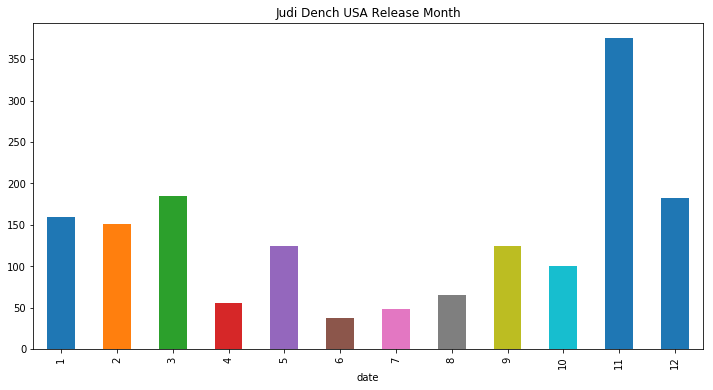

In [38]:
c = cast
r = release_dates
judi_us = c[(c.name == 'Judi Dench')]
judi_us_combo = judi_us.merge(r, on=['title','year'])
grouped = judi_us_combo.groupby(judi_us_combo.date.dt.month)
grouped.size().plot(kind='bar', figsize=[12,6], title='Judi Dench USA Release Month')

### In which months do films with Tom Cruise tend to be released in the USA?

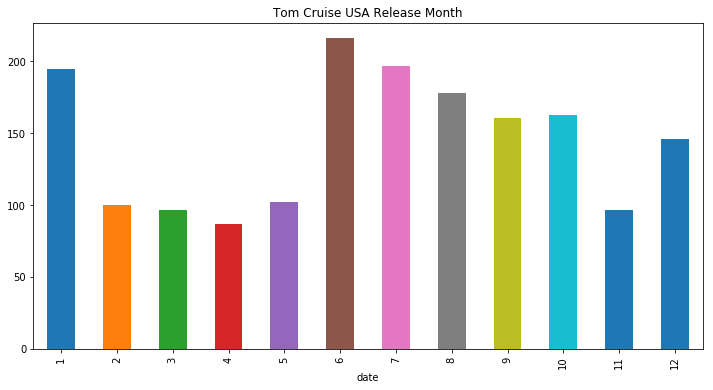

In [39]:
c = cast
r = release_dates
tcruise_us = c[(c.name == 'Tom Cruise')]
tcruise_us_combo = tcruise_us.merge(r, on=['title','year'])
grouped = tcruise_us_combo.groupby(tcruise_us_combo.date.dt.month)
grouped.size().plot(kind='bar', figsize=[12,6], title='Tom Cruise USA Release Month')